# **WEATHER CLASSIFICATION**


## **Introduction**
Dataset contains **13,200 rows and 11 columns** with no missing values. The columns are:

1. **Temperature** (float): Ranges from -25.0 to 109.0, with an average of 19.13.
2. **Humidity** (int): Ranges from 20 to 109, with an average of 68.71.
3. **Wind Speed** (float): Ranges from 0.0 to 48.5, with an average of 9.83.
4. **Precipitation (%)** (float): Ranges from 0.0 to 109.0, with an average of 53.64.
5. **Cloud Cover** (object): Categorical variable (e.g., 'partly cloudy', 'clear', 'overcast').
6. **Atmospheric Pressure** (float): Ranges from 800.12 to 1199.21, with an average of 1005.83.
7. **UV Index** (int): Ranges from 0 to 14, with an average of 4.01.
8. **Season** (object): Categorical variable (e.g., 'Winter', 'Spring').
9. **Visibility (km)** (float): Ranges from 0.0 to 20.0, with an average of 5.46.
10. **Location** (object): Categorical variable (e.g., 'inland', 'mountain', 'coastal').
11. **Weather Type** (object): Categorical variable (e.g., 'Rainy', 'Cloudy', 'Sunny').


### **Importing Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### **Importing dataset**

In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Projects/weather_classification_data.csv')

### **Analysing top 10 data**

In [3]:
df.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


### **Checking information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


### **Renaming Columns**

In [5]:
df.columns = df.columns.str.replace(' ', '_')
df = df.rename(columns = {'Precipitation_(%)':'Precipitation_percent','Visibility_(km)':'Visibility_km'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature            13200 non-null  float64
 1   Humidity               13200 non-null  int64  
 2   Wind_Speed             13200 non-null  float64
 3   Precipitation_percent  13200 non-null  float64
 4   Cloud_Cover            13200 non-null  object 
 5   Atmospheric_Pressure   13200 non-null  float64
 6   UV_Index               13200 non-null  int64  
 7   Season                 13200 non-null  object 
 8   Visibility_km          13200 non-null  float64
 9   Location               13200 non-null  object 
 10  Weather_Type           13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


### **Checking null values**

In [7]:
df.isna().sum()

,0
Temperature,0
Humidity,0
Wind_Speed,0
Precipitation_percent,0
Cloud_Cover,0
Atmospheric_Pressure,0
UV_Index,0
Season,0
Visibility_km,0
Location,0


### **Checking duplicate rows**

In [8]:
df.duplicated().sum()

0

### **Boxplot**

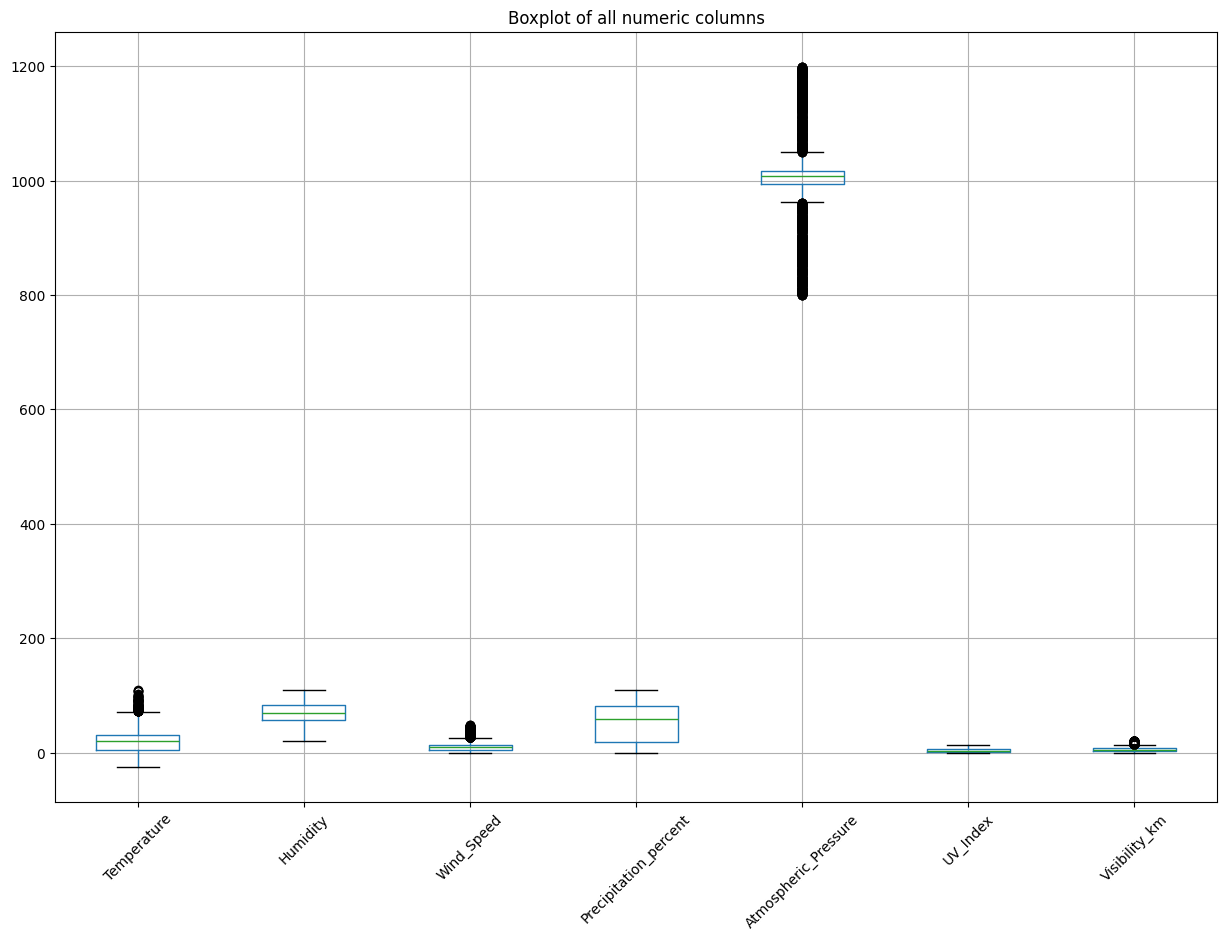

In [9]:
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15,10))
df[numeric_cols].boxplot()
plt.title('Boxplot of all numeric columns')
plt.xticks(rotation=45)
plt.show()

### **Removing outliers using InterQuartile Range**

In [10]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for i in df.select_dtypes(include=['number']).columns:
    df = remove_outliers_iqr(df, i)

## **Statistical Analysis**

### Covariance

In [11]:
df.cov(numeric_only=True)

,Temperature,Humidity,Wind_Speed,Precipitation_percent,Atmospheric_Pressure,UV_Index,Visibility_km
Temperature,250.895593,-100.801320,-11.631456,-203.558495,139.385822,27.993538,19.155464
Humidity,-100.801320,375.725659,43.063978,437.283881,-114.882543,-28.735655,-26.269730
Wind_Speed,-11.631456,43.063978,31.259257,80.945261,-18.155524,-4.213505,-5.174969
Precipitation_percent,-203.558495,437.283881,80.945261,1023.193900,-227.289640,-49.605355,-54.127239
Atmospheric_Pressure,139.385822,-114.882543,-18.155524,-227.289640,167.118717,24.346061,18.850211
UV_Index,27.993538,-28.735655,-4.213505,-49.605355,24.346061,12.114917,4.191376
Visibility_km,19.155464,-26.269730,-5.174969,-54.127239,18.850211,4.191376,6.763022


### Correlation

In [12]:
df.corr(numeric_only=True)

,Temperature,Humidity,Wind_Speed,Precipitation_percent,Atmospheric_Pressure,UV_Index,Visibility_km
Temperature,1.000000,-0.328310,-0.131340,-0.401757,0.680706,0.507751,0.465024
Humidity,-0.328310,1.000000,0.397365,0.705260,-0.458465,-0.425917,-0.521134
Wind_Speed,-0.131340,0.397365,1.000000,0.452609,-0.251193,-0.216518,-0.355916
Precipitation_percent,-0.401757,0.705260,0.452609,1.000000,-0.549652,-0.445543,-0.650679
Atmospheric_Pressure,0.680706,-0.458465,-0.251193,-0.549652,1.000000,0.541073,0.560703
UV_Index,0.507751,-0.425917,-0.216518,-0.445543,0.541073,1.000000,0.463048
Visibility_km,0.465024,-0.521134,-0.355916,-0.650679,0.560703,0.463048,1.000000


### Heatmap

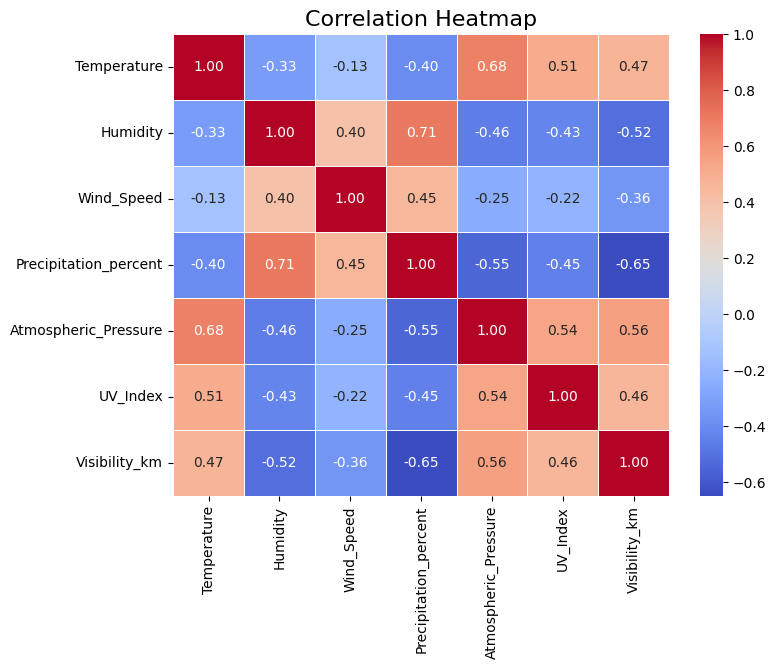

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### Describe

In [14]:
df.describe()

,Temperature,Humidity,Wind_Speed,Precipitation_percent,Atmospheric_Pressure,UV_Index,Visibility_km
count,11586.000000,11586.000000,11586.000000,11586.000000,11586.00000,11586.000000,11586.000000
mean,19.064733,69.373727,9.186561,51.704212,1006.26002,3.521146,5.113931
std,15.839684,19.383644,5.590998,31.987402,12.92744,3.480649,2.600581
min,-24.000000,20.000000,0.000000,0.000000,962.88000,0.000000,0.000000
25%,8.000000,59.000000,5.000000,18.000000,995.83000,1.000000,3.000000
50%,22.000000,70.000000,8.500000,56.000000,1007.90500,2.000000,5.000000
75%,30.000000,84.000000,13.500000,80.000000,1016.28000,6.000000,7.500000
max,71.000000,109.000000,26.000000,109.000000,1049.20000,13.000000,14.000000


### **Count Plot**

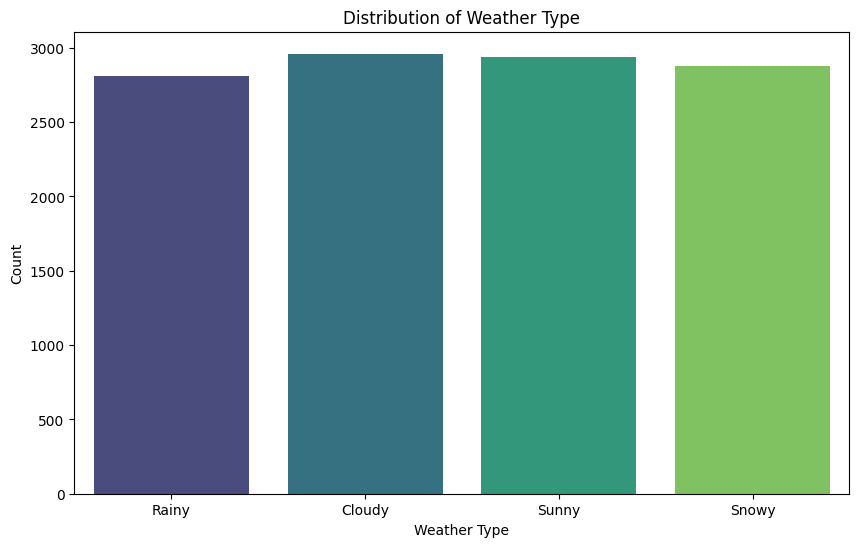

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_Type', data=df, palette='viridis')
plt.title('Distribution of Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.show()

### **Histogram**

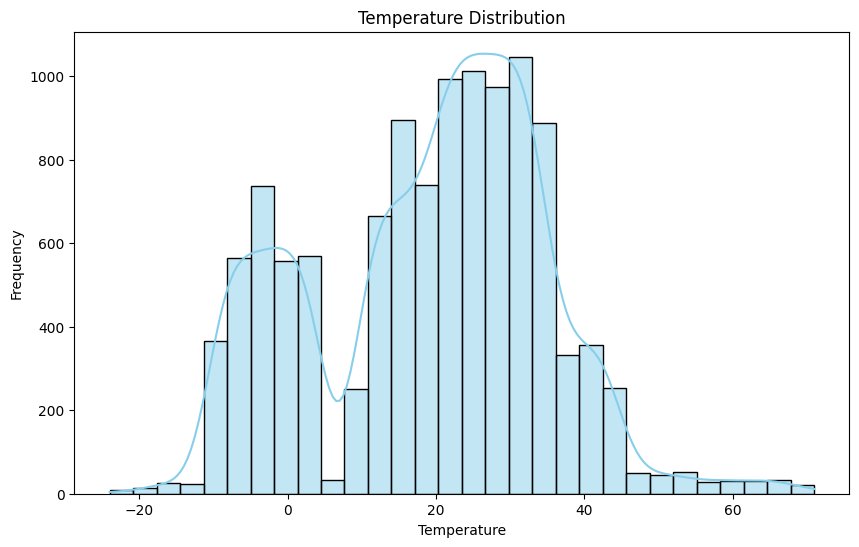

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature'], bins=30, kde=True, color='skyblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

### **Pie Chart**

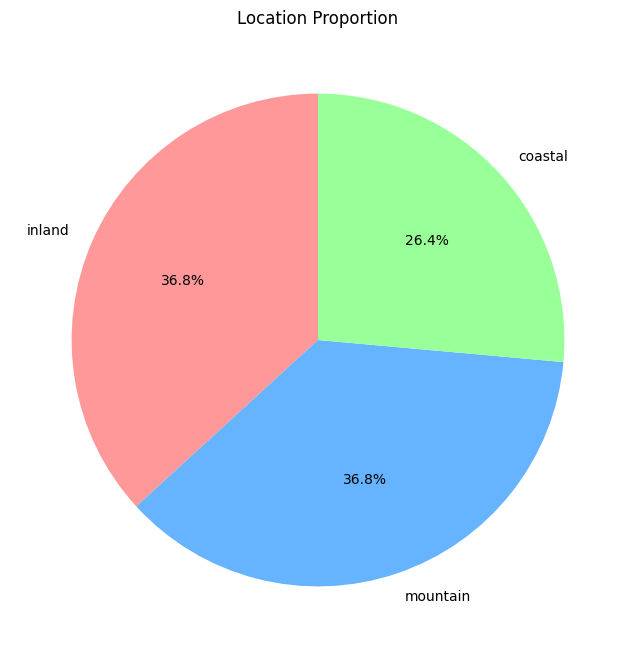

In [17]:
plt.figure(figsize=(8, 8))
location_counts = df['Location'].value_counts()
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Location Proportion')
plt.show()

### **Line Chart**

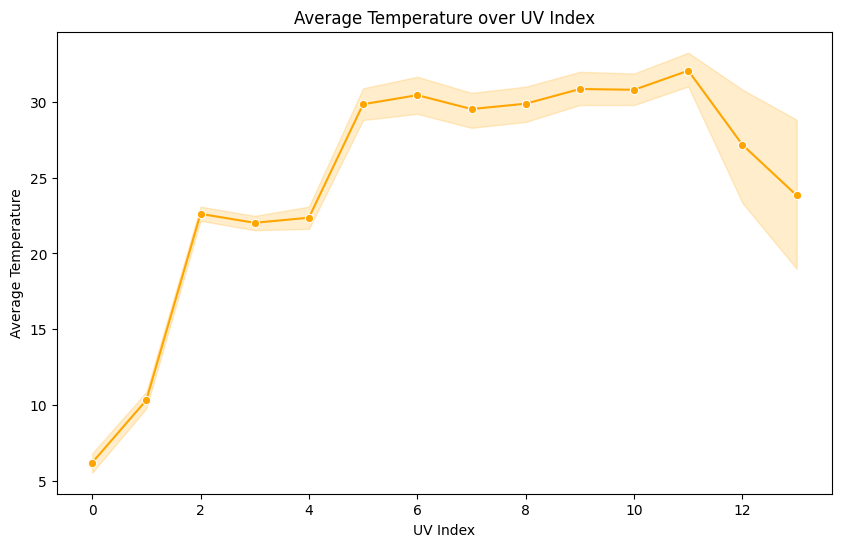

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='UV_Index', y='Temperature', data=df, marker='o', color='orange')
plt.title('Average Temperature over UV Index')
plt.xlabel('UV Index')
plt.ylabel('Average Temperature')
plt.show()

### **Splitting numerical and categorical columns**

In [19]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Weather_Type')

In [20]:
df[numerical_cols].head()

,Temperature,Humidity,Wind_Speed,Precipitation_percent,Atmospheric_Pressure,UV_Index,Visibility_km
0,14.0,73,9.5,82.0,1010.82,2,3.5
1,39.0,96,8.5,71.0,1011.43,7,10.0
2,30.0,64,7.0,16.0,1018.72,5,5.5
3,38.0,83,1.5,82.0,1026.25,7,1.0
4,27.0,74,17.0,66.0,990.67,1,2.5


In [21]:
df[categorical_cols].head()

,Cloud_Cover,Season,Location
0,partly cloudy,Winter,inland
1,partly cloudy,Spring,inland
2,clear,Spring,mountain
3,clear,Spring,coastal
4,overcast,Winter,mountain


### **StandardScaler and OneHotEncoder using ColumnTransformer**

In [22]:
transformer = ColumnTransformer(
    transformers=[('numerical', StandardScaler(),numerical_cols),
   ('categorical', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'),
       categorical_cols)],remainder='passthrough')

### **Selecting x and y**

In [23]:
x = df.drop('Weather_Type', axis=1)

In [24]:
x = transformer.fit_transform(x)

In [25]:
feature_names = list(numerical_cols)

encoded_cols = list(transformer.named_transformers_['categorical'].get_feature_names_out(categorical_cols))
feature_names.extend(encoded_cols)

In [26]:
x = pd.DataFrame(x, columns = feature_names)

In [27]:
x.head()

,Temperature,Humidity,Wind_Speed,Precipitation_percent,Atmospheric_Pressure,UV_Index,Visibility_km,Cloud_Cover_cloudy,Cloud_Cover_overcast,Cloud_Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
0,-0.319763,0.187087,0.056064,0.947157,0.352752,-0.437048,-0.620631,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.258619,1.373706,-0.122803,0.603257,0.399940,0.999527,1.878919,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.690401,-0.277242,-0.391103,-1.116244,0.963881,0.424897,0.148461,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.195484,0.703008,-1.374870,0.947157,1.546388,0.999527,-1.581996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.500995,0.238679,1.397564,0.446939,-1.206015,-0.724363,-1.005177,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [28]:
y = df['Weather_Type']

### **LabelEncoding y**

In [29]:
le = LabelEncoder()
y = le.fit_transform(y)

In [30]:
y_encoded = pd.DataFrame(y, columns = ['Weather_Type'])

In [31]:
y_encoded.head()

,Weather_Type
0,1
1,0
2,3
3,3
4,1


### **Scatterplot**

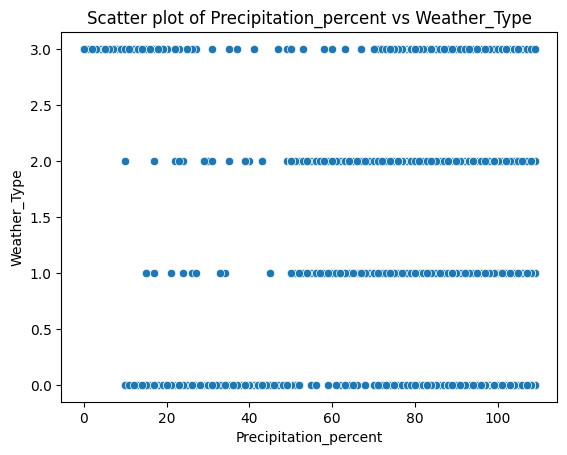

In [32]:
sns.scatterplot(df,x='Precipitation_percent', y=y)
plt.xlabel('Precipitation_percent')
plt.ylabel('Weather_Type')
plt.title(f'Scatter plot of Precipitation_percent vs Weather_Type')
plt.show()

### **Train Test Splitting**

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### **Classifying Weather using Random Forest Classifier**

In [34]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

### **Checking Accuracy**

Random Forest Accuracy: 0.9767040552200172
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       597
           1       0.98      0.97      0.98       574
           2       0.99      0.98      0.99       546
           3       0.99      0.98      0.98       601

    accuracy                           0.98      2318
   macro avg       0.98      0.98      0.98      2318
weighted avg       0.98      0.98      0.98      2318



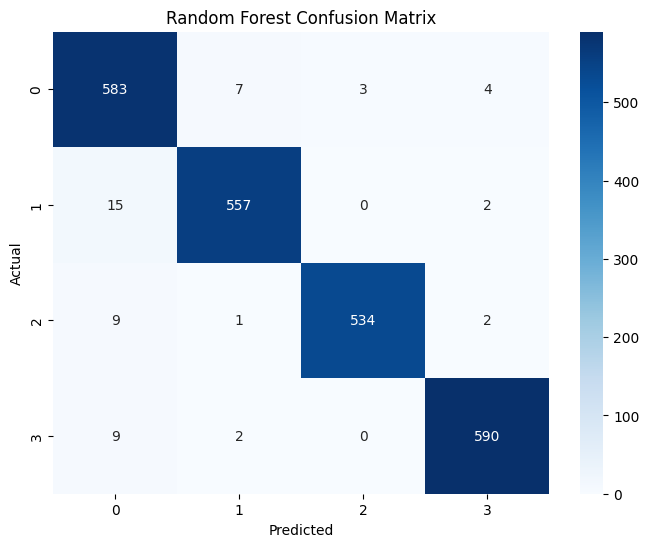

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

##  **Summary**  

1. **Dataset Overview:**
   - Contains **13,200 rows and 11 columns** with no missing values.
   - Categorical Columns: **Cloud Cover, Season, Location, Weather Type** (Target Variable).
   - Numerical Columns: **Temperature, Humidity, Wind Speed, Precipitation (%), Atmospheric Pressure, UV Index, Visibility (km)**.

2. **Plots Generated:**
   - **Bar Plot:** Shows distribution of different weather types.
   - **Histogram:** Displays temperature distribution with a KDE curve.
   - **Pie Chart:** Illustrates the proportion of data points across locations (inland, mountain, coastal).
   - **Line Chart:** Average temperature trends across different UV index levels.

3. **Outlier Handling:**  
   - Outliers were removed from numerical columns using the **Interquartile Range (IQR)** method.

4. **Correlation Analysis:**  
   - A **Correlation Heatmap** was generated to identify relationships between numerical features.
   - Some correlations were identified, but most variables appear weakly correlated.

5. **Feature Encoding & Scaling:**  
   - **Numerical Features:** Scaled using **StandardScaler**.
   - **Categorical Features:** Converted to numerical format using **OneHotEncoder**.
   - **Weather Type:** Label-encoded for model training.

6. **Model Training:**  
   - Used **Random Forest Classifier** for predicting weather types.
   - Achieved an **accuracy score** above 90%.

7. **Visualization:**  
   - **Confusion Matrix** was plotted to evaluate the model’s performance.
